starting with clearing the old variables

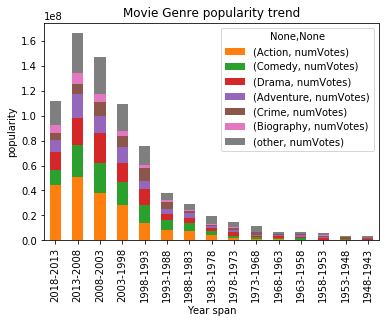

In [12]:
df_plot_data_1=df_plot_data_1.reset_index()
df_plot_data_1['index']=df_plot_data_1['index'].astype('int32')
df_plot_data_1['index']=df_plot_data_1['index'].astype(str)+'-'+(df_plot_data_1['index']-5).astype(str)
df_plot_data_1.set_index("index",drop=True,inplace=True)
#list_plot_1=list(set(df_plot_data_1.columns.levels[0].tolist())-set(['index']))
list_plot_1=list_genre[0:n_genre]+['other']
# prepare figure 1b
df_plot_data_1_sum=df_plot_data_1[(list_plot_1[0],'numVotes')]
for j in range(1, len(list_plot_1)):
    df_plot_data_1_sum=df_plot_data_1_sum+df_plot_data_1[(list_plot_1[j],'numVotes')]
df_plot_data_1_dist={}
for j in range(0, len(list_plot_1)):
    df_plot_data_1_dist[list_plot_1[j]]=df_plot_data_1[(list_plot_1[j],'numVotes')]/df_plot_data_1_sum
df_plot_data_1_dist=pd.concat(df_plot_data_1_dist, axis=1)

#figure 1
b_value=np.zeros(len(df_plot_data_1['other','numVotes']))
plot_1 = df_plot_data_1.plot(y=(list_plot_1[0],'numVotes'), kind="bar",color="C1",stacked=True,bottom = b_value)
for j in range(1, len(list_plot_1)):
    b_value += list(df_plot_data_1.loc[:,(list_plot_1[j-1],'numVotes')])
    df_plot_data_1.plot(y=(list_plot_1[j],'numVotes'), kind="bar", ax=plot_1,color="C"+str(j+1),stacked=True,bottom = b_value)
plot_1.set_xlabel("Year span")
plot_1.set_ylabel("popularity")
plot_1.set_title("Movie Genre popularity trend")
plt.show()


plot 1b: share of each genre

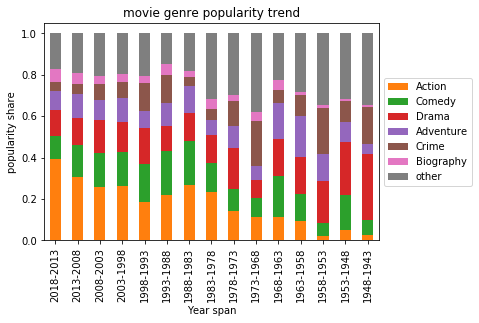

In [13]:
b_value=np.zeros(len(df_plot_data_1_dist))
plot_1b = df_plot_data_1_dist.plot(y=list_plot_1[0], kind="bar",color="C1",stacked=True,bottom = b_value)
for j in range(1, len(list_plot_1)):
    b_value += list(df_plot_data_1_dist.loc[:,list_plot_1[j-1]])
    df_plot_data_1_dist.plot(y=list_plot_1[j], kind="bar", ax=plot_1b,color="C"+str(j+1),stacked=True,bottom = b_value)
plot_1b.set_xlabel("Year span")
plot_1b.set_ylabel("popularity share")
plot_1b.set_title("movie genre popularity trend")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

or

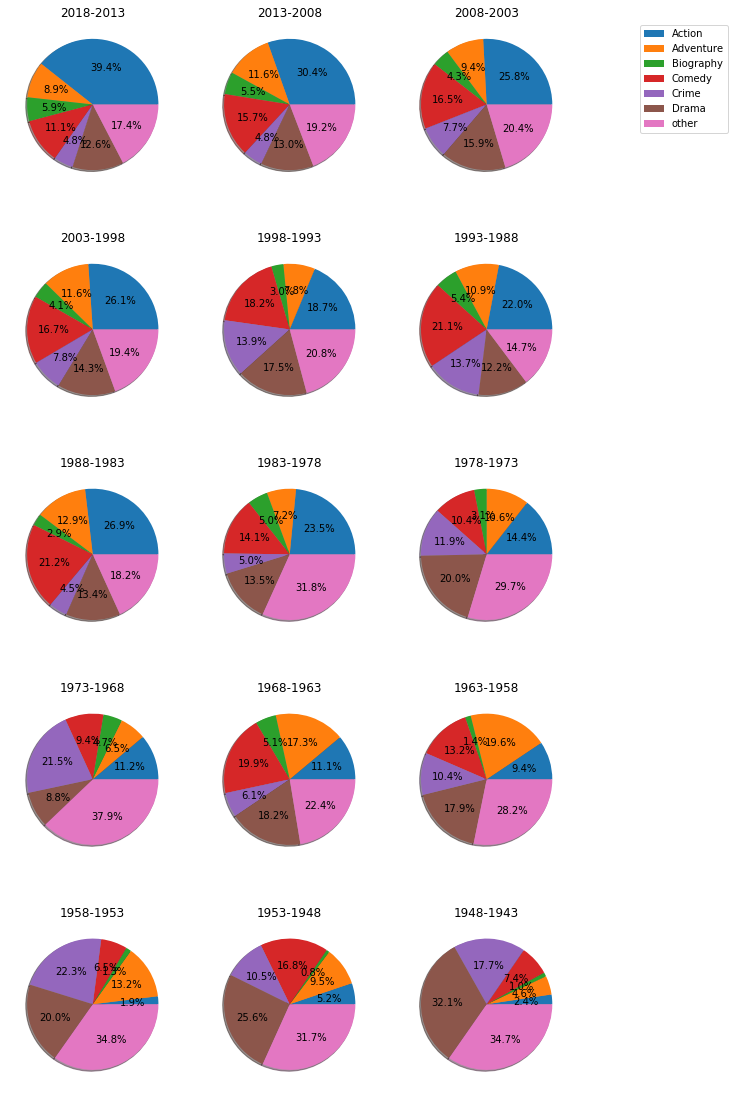

In [14]:
fig, plot_1b = plt.subplots(5,3, figsize=(10,20))
m=0
n=0
for i in range(0,15):
    plot_1b[m, n].pie(df_plot_data_1_dist.loc[df_plot_data_1_dist.index[i]], autopct='%1.1f%%', shadow=True)
    n+=1
    if n>2:
        n=0
        m+=1
for i, ax in enumerate(plot_1b.flatten()):
    ax.set_title(df_plot_data_1_dist.index[i])
plt.legend(df_plot_data_1_dist.columns,bbox_to_anchor=(2, 6.5))
plt.show()

plot 1c: average rating

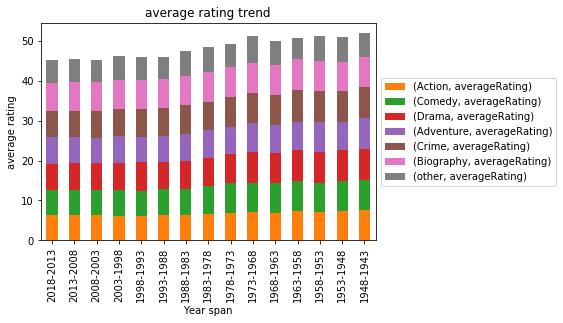

In [15]:
b_value=np.zeros(len(df_plot_data_1['other','averageRating']))
plot_1 = df_plot_data_1.plot(y=(list_plot_1[0],'averageRating'), kind="bar",color="C1",stacked=True,bottom = b_value)
for j in range(1, len(list_plot_1)):
    b_value += list(df_plot_data_1.loc[:,(list_plot_1[j-1],'averageRating')])
    df_plot_data_1.plot(y=(list_plot_1[j],'averageRating'), kind="bar", ax=plot_1,color="C"+str(j+1),stacked=True,bottom = b_value)
plot_1.set_xlabel("Year span")
plot_1.set_ylabel("average rating")
plot_1.set_title("average rating trend")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


plot 2: TV seriev vs movies

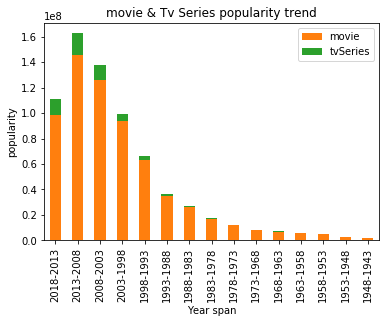

In [16]:
df_plot_data_2=df_plot_data_2.reset_index()
df_plot_data_2['index']=df_plot_data_2['index'].astype('int32')
df_plot_data_2['index']=df_plot_data_2['index'].astype(str)+'-'+(df_plot_data_2['index']-5).astype(str)
df_plot_data_2.set_index("index",drop=True,inplace=True)
b_value=np.zeros(len(df_plot_data_2['movie']))
plot_2 = df_plot_data_2.plot(y="movie", kind="bar",color="C1",stacked=True,bottom = b_value)
b_value+=list(df_plot_data_2.loc[:,"movie"])
df_plot_data_2.plot(y="tvSeries", kind="bar", ax=plot_2,color="C2",stacked=True,bottom = b_value)
plot_2.set_xlabel("Year span")
plot_2.set_ylabel("popularity")
plot_2.set_title("movie & Tv Series popularity trend")
plt.show()

plot 3a: net revenue per genre

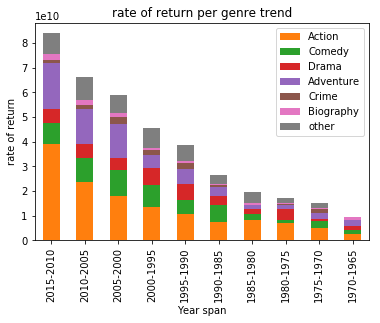

In [17]:
df_plot_data_3=df_plot_data_3.reset_index()
df_plot_data_3['index']=df_plot_data_3['index'].astype('int32')
df_plot_data_3['index']=df_plot_data_3['index'].astype(str)+'-'+(df_plot_data_3['index']-5).astype(str)
df_plot_data_3.set_index("index",drop=True,inplace=True)

# figure 3
df_plot_data_3_rev={}
for j in range(0, len(list_plot_1)):
    df_plot_data_3_rev[list_plot_1[j]]=df_plot_data_3[(list_plot_1[j],'revenue_adj')]-df_plot_data_3[(list_plot_1[j],'budget_adj')]
df_plot_data_3_rev=pd.concat(df_plot_data_3_rev, axis=1)

b_value=np.zeros(len(df_plot_data_3_rev['other']))
plot_3 = df_plot_data_3_rev.plot(y=(list_plot_1[0]), kind="bar",color="C1",stacked=True,bottom = b_value)
for j in range(1, len(list_plot_1)):
    b_value += list(df_plot_data_3_rev.loc[:,list_plot_1[j-1]])
    df_plot_data_3_rev.plot(y=list_plot_1[j], kind="bar", ax=plot_3,color="C"+str(j+1),stacked=True,bottom = b_value)
plot_3.set_xlabel("Year span")
plot_3.set_ylabel("rate of return")
plot_3.set_title("rate of return per genre trend")
plt.show()

figure 3b:net revenue share per genre

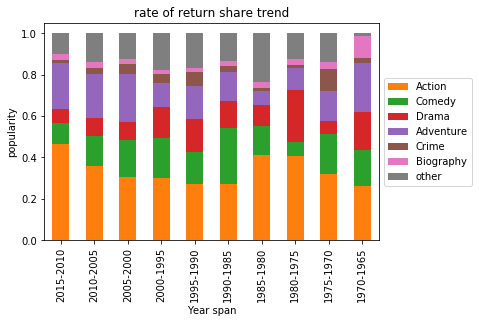

In [18]:
df_plot_data_3_ratio={}
for j in range(0, len(list_plot_1)):
    df_plot_data_3_ratio[list_plot_1[j]]=df_plot_data_3_rev[list_plot_1[j]]/df_plot_data_3[(list_plot_1[j],'budget_adj')]
for j in range(0, len(list_plot_1)):
    df_plot_data_3_ratio[list_plot_1[j]]=df_plot_data_3_rev[list_plot_1[j]]/df_plot_data_3_rev.sum(axis=1)
df_plot_data_3_ratio=pd.concat(df_plot_data_3_ratio, axis=1)
b_value=np.zeros(len(df_plot_data_3_ratio['other']))
plot_3b = df_plot_data_3_ratio.plot(y=(list_plot_1[0]), kind="bar",color="C1",stacked=True,bottom = b_value)
for j in range(1, len(list_plot_1)):
    b_value += list(df_plot_data_3_ratio.loc[:,list_plot_1[j-1]])
    df_plot_data_3_ratio.plot(y=list_plot_1[j], kind="bar", ax=plot_3b,color="C"+str(j+1),stacked=True,bottom = b_value)
plot_3b.set_xlabel("Year span")
plot_3b.set_ylabel("popularity")
plot_3b.set_title("rate of return share trend")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()